# Data Analysis of Global Terrorism Dataset

This work is done for the course "Data Visualization Techniques" in Sabanci University

Datasets: https://www.theglobaleconomy.com/<br>
https://www.kaggle.com/START-UMD/gtd<br>

The organized & clean blog for the analysis can be found in the link:
https://da518melihekinci.wordpress.com/2021/03/21/global-terrorism-dataset-analysis-with-social-indicators/

Importing libraries and the csv file.

In [ ]:
import missingno as msno

In [41]:
import plotly.graph_objects as go

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set()

import warnings
warnings.filterwarnings("ignore") # Don't display the warnings in the notebook

In [2]:
df= pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country':'Country','region':'Region','attacktype1':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1':'Target_type','weaptype1':'Weapon_type','motive':'Motive','location':'Location','natlty1':'Nationality_target','nperps':'numberofterrorists','alternative':'alternative1'},inplace=True)
terror=df[['Year','Month','Day','Country','Region','city','Location','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','success','suicide','Nationality_target','numberofterrorists','claimed','ishostkid','property','ransom','extended','crit1','crit2','crit3','doubtterr','alternative1','multiple','INT_LOG','INT_IDEO','attacktype1_txt','region_txt','alternative_txt','country_txt','natlty1_txt','targtype1_txt']]
terror.head()

,Year,Month,Day,Country,Region,city,Location,latitude,longitude,AttackType,...,alternative1,multiple,INT_LOG,INT_IDEO,attacktype1_txt,region_txt,alternative_txt,country_txt,natlty1_txt,targtype1_txt
0,1970,7,2,58,2,Santo Domingo,NaN,18.456792,-69.951164,1,...,NaN,0.0,0,0,Assassination,Central America & Caribbean,NaN,Dominican Republic,Dominican Republic,Private Citizens & Property
1,1970,0,0,130,1,Mexico city,NaN,19.371887,-99.086624,6,...,NaN,0.0,0,1,Hostage Taking (Kidnapping),North America,NaN,Mexico,Belgium,Government (Diplomatic)
2,1970,1,0,160,5,Unknown,NaN,15.478598,120.599741,1,...,NaN,0.0,-9,-9,Assassination,Southeast Asia,NaN,Philippines,United States,Journalists & Media
3,1970,1,0,78,8,Athens,NaN,37.997490,23.762728,3,...,NaN,0.0,-9,-9,Bombing/Explosion,Western Europe,NaN,Greece,United States,Government (Diplomatic)
4,1970,1,0,101,4,Fukouka,NaN,33.580412,130.396361,7,...,NaN,0.0,-9,-9,Facility/Infrastructure Attack,East Asia,NaN,Japan,United States,Government (Diplomatic)


In [6]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                181691 non-null  int64  
 1   Month               181691 non-null  int64  
 2   Day                 181691 non-null  int64  
 3   Country             181691 non-null  int64  
 4   Region              181691 non-null  int64  
 5   city                181257 non-null  object 
 6   Location            55495 non-null   object 
 7   latitude            177135 non-null  float64
 8   longitude           177134 non-null  float64
 9   AttackType          181691 non-null  int64  
 10  Killed              171378 non-null  float64
 11  Wounded             165380 non-null  float64
 12  Target              181055 non-null  object 
 13  Summary             115562 non-null  object 
 14  Group               181691 non-null  object 
 15  Target_type         181691 non-nul

In [6]:
terror["one"]=1

Analyzing missing values in each column in the dataset.

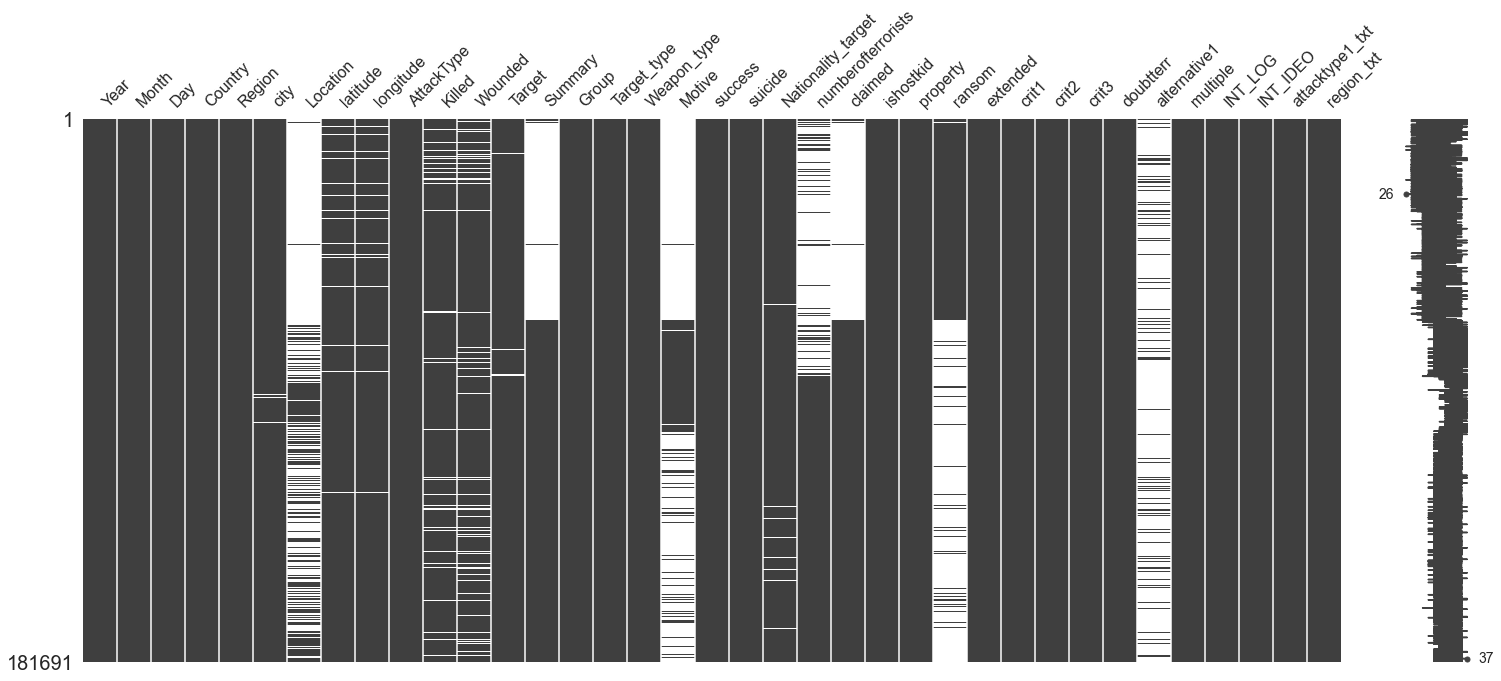

In [62]:
msno.matrix(terror)

Looking at correlation matrix to understand relations.

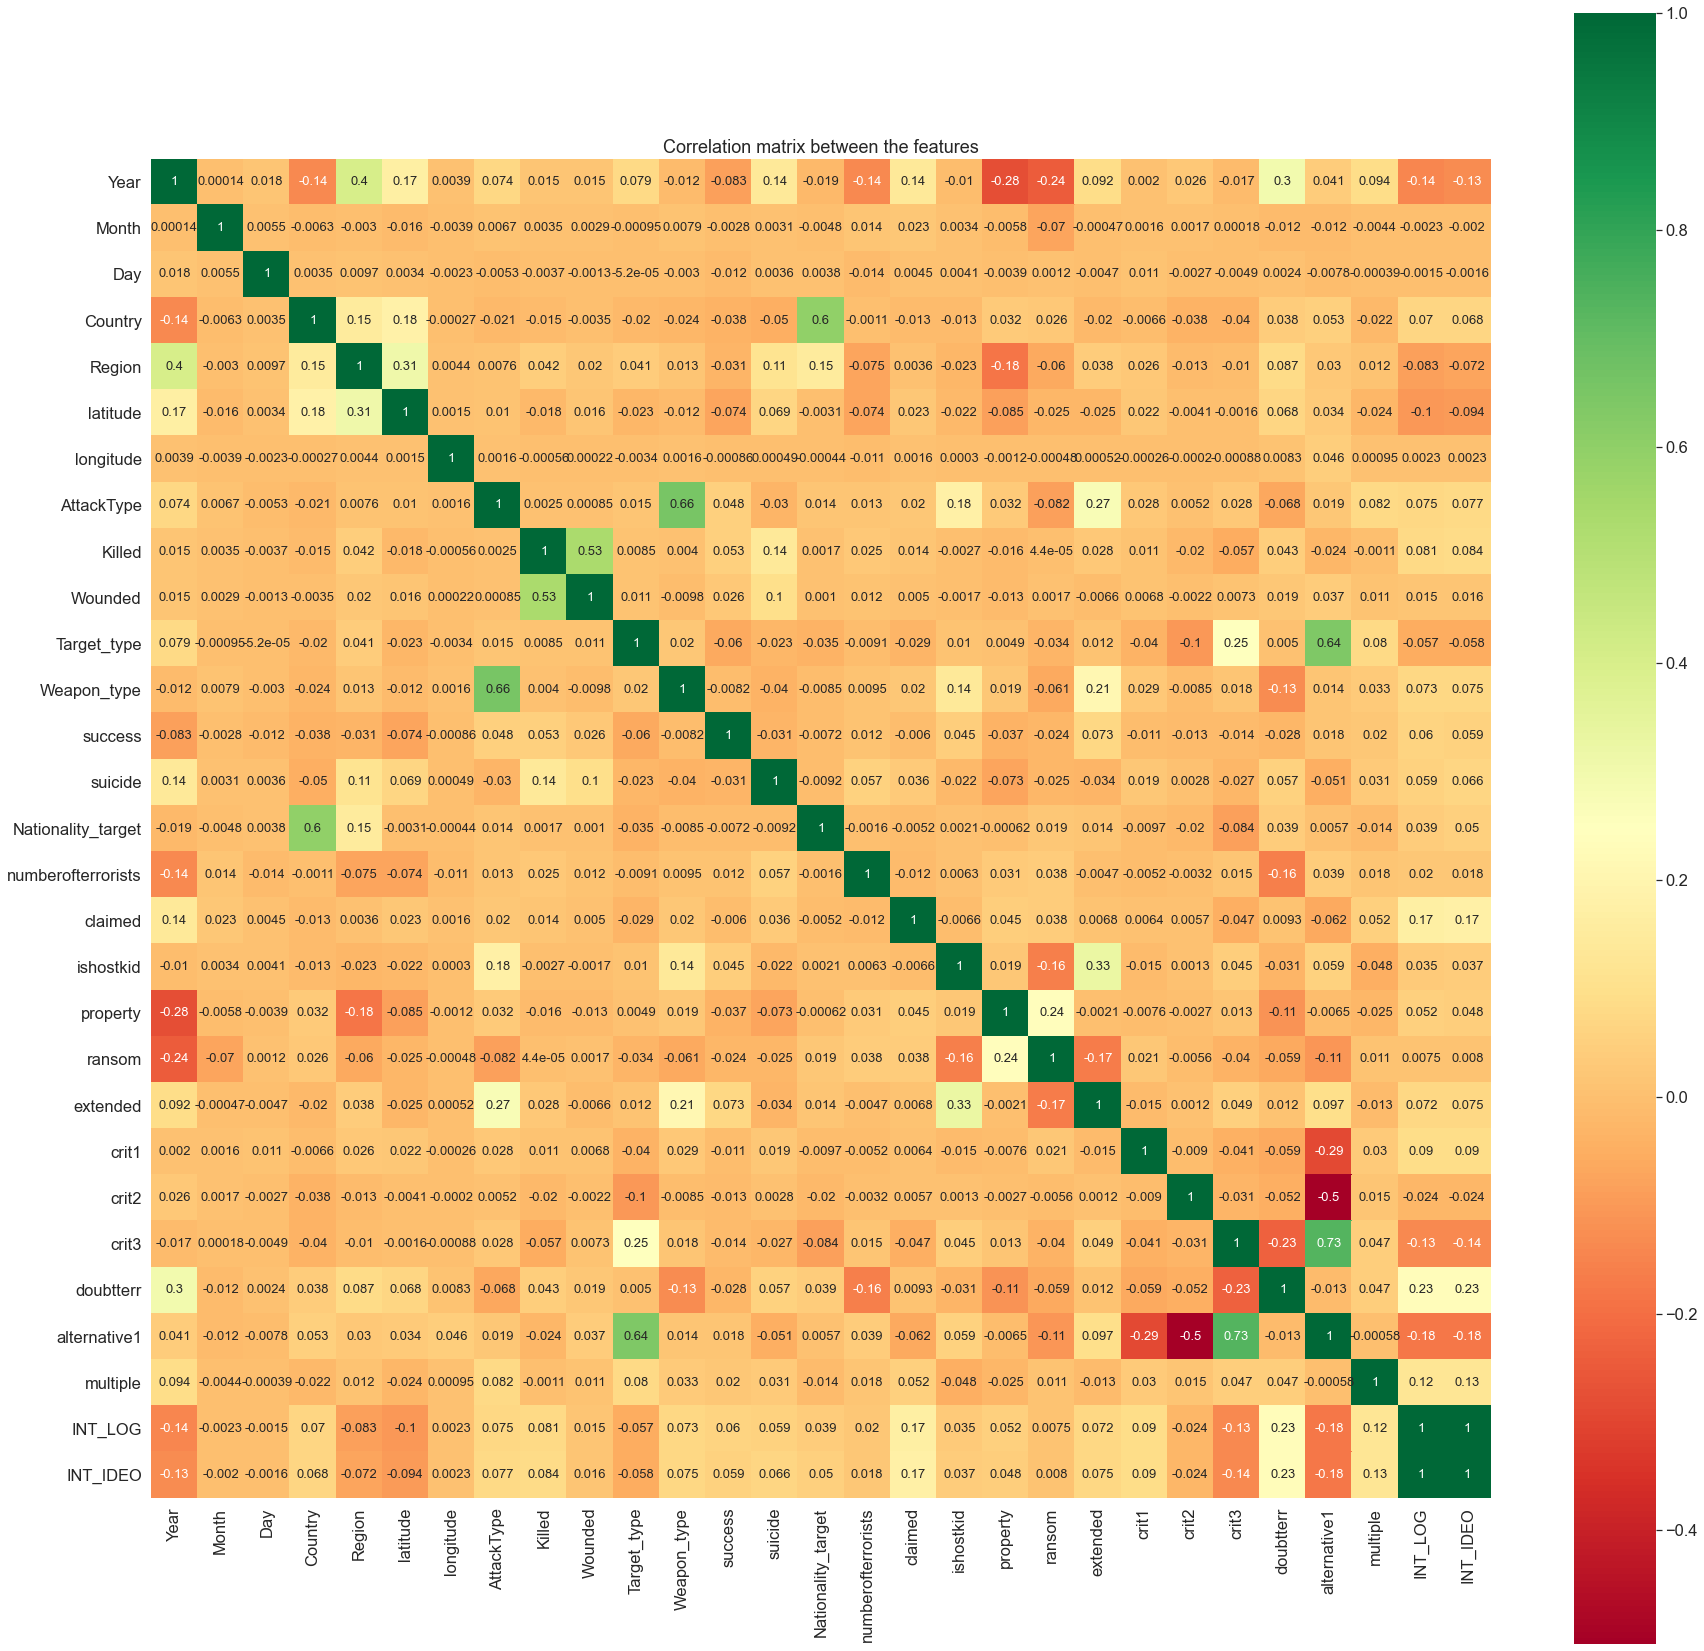

In [8]:

sns.set(font_scale=1.5)  
correlation_matrix = terror.corr()
plt.figure(figsize=(30,30))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='RdYlGn',annot_kws={'size': 13})
plt.title('Correlation matrix between the features')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Number of Terrorist Activities by Countries and year

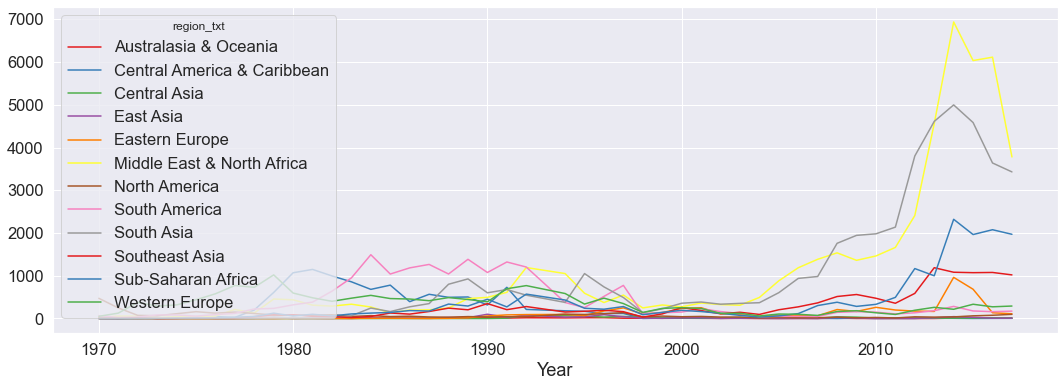

In [9]:
terror=pd.crosstab(df.Year,df.region_txt)
terror.plot(color=sns.color_palette('Set1',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Number of Total Terrorist Activities by Countries

In [89]:
df.groupby(['country_txt']).count()["eventid"].sort_values(ascending=False).head(20)

country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: eventid, dtype: int64

Terrorism is the use of extreme and intentional violence by terrorist groups in order to achieve their political, social or economic goals. Terrorist activities have increased during the period 2003-2014 and it’s been declining since 2014.Terrorism is the use of extreme and intentional violence by terrorist groups in order to achieve their political, social or economic goals. Terrorist activities have increased during the period 2003-2014 and it’s been declining since 2014.

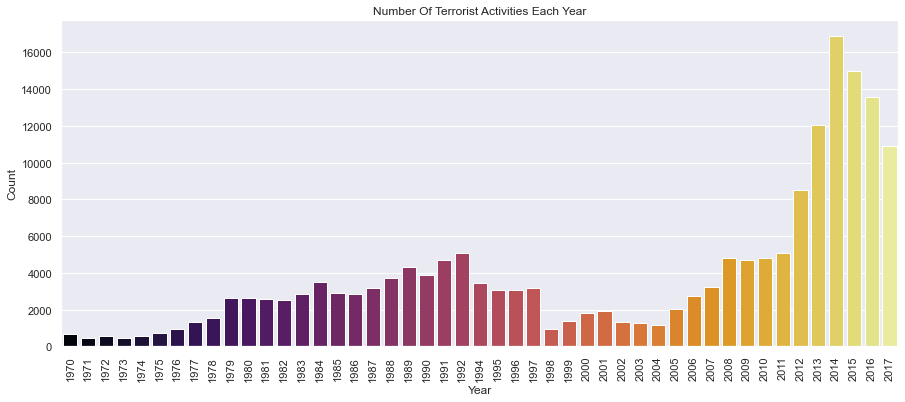

In [7]:
plt.subplots(figsize=(15,6))
ax=sns.countplot('Year',data=df,palette='inferno')
ax.set(xlabel='Year', ylabel='Count')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.savefig('g1.png',bbox_inches='tight')
plt.show()


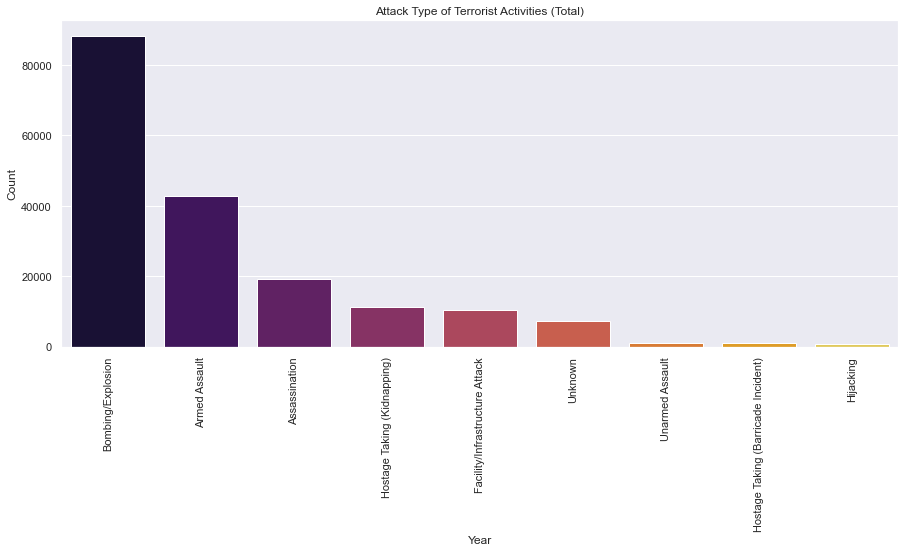

In [16]:
plt.subplots(figsize=(15,6))
ax=sns.countplot('attacktype1_txt',data=df,palette='inferno',order=df['attacktype1_txt'].value_counts().index)
ax.set(xlabel='Year', ylabel='Count')
plt.xticks(rotation=90)
plt.title('Attack Type of Terrorist Activities (Total)')
plt.show()

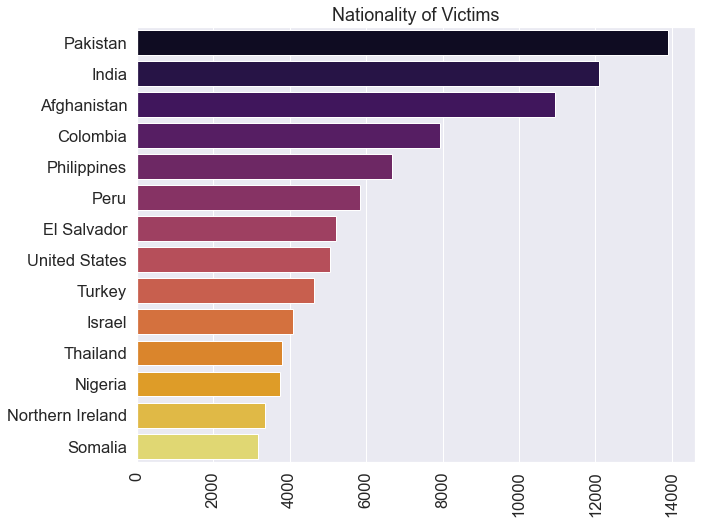

In [219]:
sns.barplot(terror['natlty1_txt'].value_counts()[1:15].values,terror['natlty1_txt'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Nationality of Victims')
plt.savefig('g3.png',bbox_inches='tight')
plt.show()

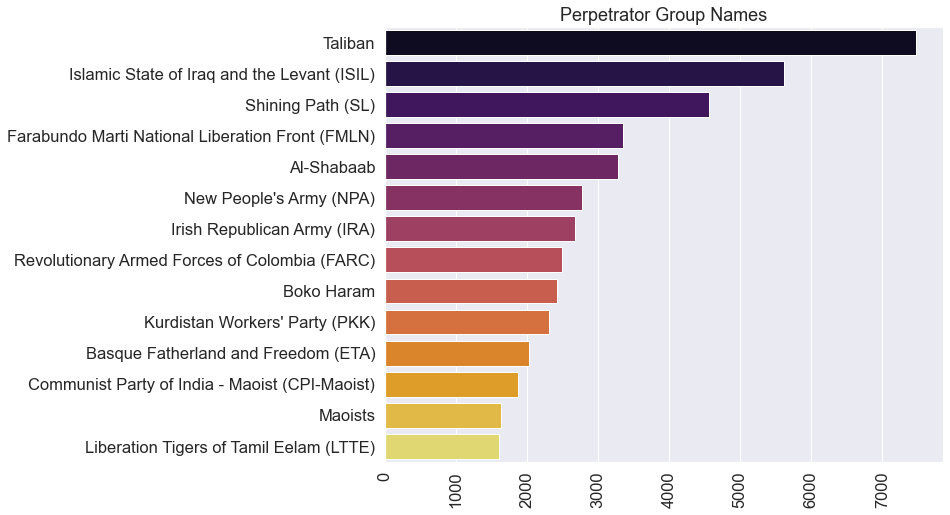

In [220]:
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Perpetrator Group Names')
plt.savefig('g4.png',bbox_inches='tight')
plt.show()

In [68]:
terror.targtype1_txt.unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [13]:
terror5=terror.groupby(by=["Year"]).sum().reset_index()
terror6=terror5[["Killed",'Year',"Wounded"]]


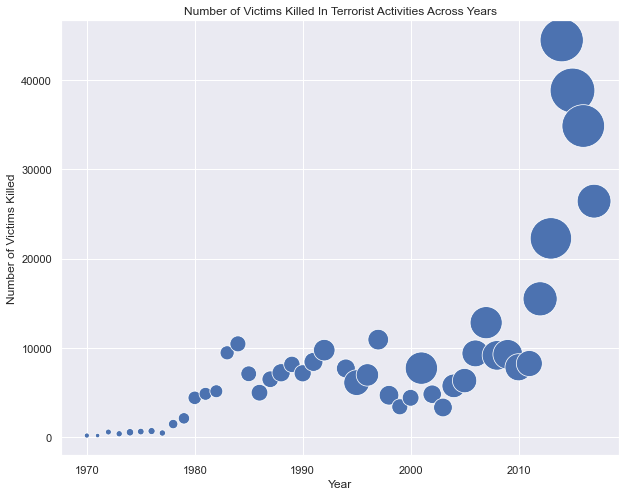

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import gapminder # data set


plt.figure(figsize=(10,8))
# use the scatterplot function to build the bubble map
ax=sns.scatterplot(data=terror6, x="Year", y="Killed", size="Wounded", legend=False, sizes=(20, 2000))
ax.set(xlabel='Year', ylabel='Number of Victims Killed')
plt.title('Number of Victims Killed In Terrorist Activities Across Years')
# show the graph
plt.show()

Text(0.5, 1.0, 'Number of Terrorist Activities of Top 15 Terrorist Groups Across Years')

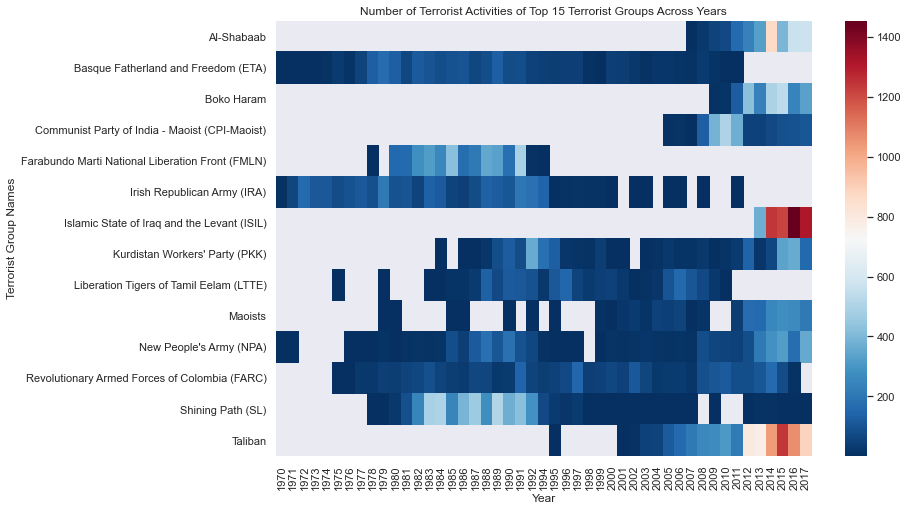

In [52]:
terror4=terror[["Group","Year",'one']]
terror6=terror4.groupby(by=["Group","Year"]).sum().reset_index()
terror6
b=terror['Group'].value_counts()[1:15].index.tolist()
terror7=terror6[terror6.Group.isin(b)]
terror8=terror7.pivot("Group", "Year", "one")
plt.figure(figsize=(12,8))
ax=sns.heatmap(terror8, cmap="RdBu_r")
ax.set(xlabel='Year', ylabel='Terrorist Group Names')
plt.title('Number of Terrorist Activities of Top 15 Terrorist Groups Across Years')

Text(0.5, 1.0, 'Number of Terrorist Activities Across Regions and Years')

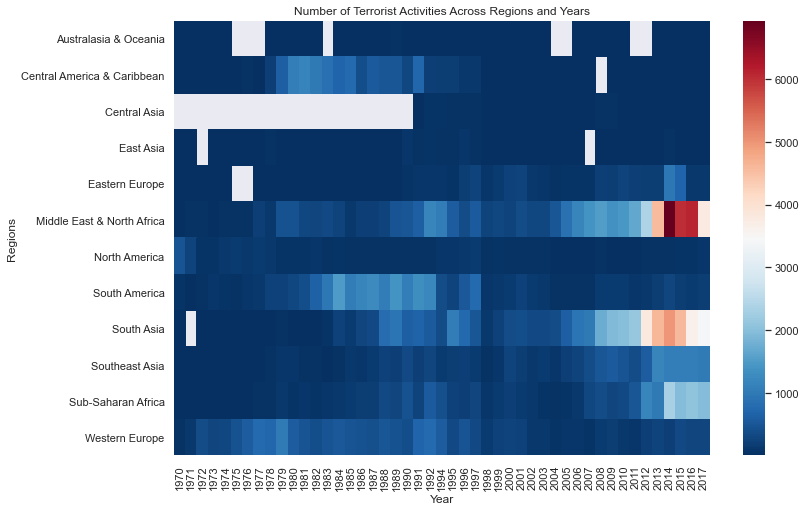

In [70]:
terror4=terror[["region_txt","Year",'one']]
terror6=terror4.groupby(by=["region_txt","Year"]).sum().reset_index()
terror8=terror6.pivot("region_txt", "Year", "one")
plt.figure(figsize=(12,8))
ax=sns.heatmap(terror8, cmap="RdBu_r")
ax.set(xlabel='Year', ylabel='Regions')
plt.title('Number of Terrorist Activities Across Regions and Years')

In [185]:
df.country_txt.unique().tolist()

['Dominican Republic',
 'Mexico',
 'Philippines',
 'Greece',
 'Japan',
 'United States',
 'Uruguay',
 'Italy',
 'East Germany (GDR)',
 'Ethiopia',
 'Guatemala',
 'Venezuela',
 'West Germany (FRG)',
 'Switzerland',
 'Jordan',
 'Spain',
 'Brazil',
 'Egypt',
 'Argentina',
 'Lebanon',
 'Ireland',
 'Turkey',
 'Paraguay',
 'Iran',
 'United Kingdom',
 'Colombia',
 'Bolivia',
 'Nicaragua',
 'Netherlands',
 'Belgium',
 'Canada',
 'Australia',
 'Pakistan',
 'Zambia',
 'Sweden',
 'Costa Rica',
 'South Yemen',
 'Cambodia',
 'Israel',
 'Poland',
 'Taiwan',
 'Panama',
 'Kuwait',
 'West Bank and Gaza Strip',
 'Austria',
 'Czechoslovakia',
 'India',
 'France',
 'South Vietnam',
 'Brunei',
 'Zaire',
 "People's Republic of the Congo",
 'Portugal',
 'Algeria',
 'El Salvador',
 'Thailand',
 'Haiti',
 'Sudan',
 'Morocco',
 'Cyprus',
 'Myanmar',
 'Afghanistan',
 'Peru',
 'Chile',
 'Honduras',
 'Yugoslavia',
 'Ecuador',
 'New Zealand',
 'Malaysia',
 'Singapore',
 'Botswana',
 'Jamaica',
 'Chad',
 'North Yeme

In [14]:
terror_=terror.groupby(by=["Year",'country_txt']).sum().reset_index()
deneme=terror_[["Year",'country_txt','one']]

In [15]:
deneme2=deneme.rename(columns={"country_txt": "Country"})

In [16]:
deneme2.drop_duplicates()

,Year,Country,one
0,1970,Argentina,21
1,1970,Australia,1
2,1970,Belgium,1
3,1970,Bolivia,1
4,1970,Brazil,6
...,...,...,...
3757,2017,Vietnam,2
3758,2017,West Bank and Gaza Strip,83
3759,2017,Yemen,226
3760,2017,Zambia,2


In [17]:
df= pd.read_excel('Kitap2.xlsx')

In [18]:
df2=df.drop_duplicates()

In [208]:
df.head()

,Country,Year,Economic growth: the rate of change of real GDP,"GDP per capita, constant 2010 dollars",Unemployment rate,"Youth unemployment, ages 15-24",Property rights index (0-100),Freedom from corruption index (0-100),Fiscal freedom index (0-100),Business freedom index (0-100),Labor freedom index (0-100),Monetary freedom index (0-100),Trade freedom index (0-100),Investment freedom index (0-100),Financial freedom index (0-100),"Economic freedom, overall index (0-100)"
0,Afghanistan,1991,NaN,NaN,11.38,17.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1992,NaN,NaN,11.46,17.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1993,NaN,NaN,11.61,18.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1994,NaN,NaN,11.65,18.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1995,NaN,NaN,11.65,18.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
result = pd.merge(deneme2, df2, on=["Country","Year"])
result.head()

,Year,Country,one,Economic growth: the rate of change of real GDP,"GDP per capita, constant 2010 dollars",Unemployment rate,"Youth unemployment, ages 15-24",Property rights index (0-100),Freedom from corruption index (0-100),Fiscal freedom index (0-100),Business freedom index (0-100),Labor freedom index (0-100),Monetary freedom index (0-100),Trade freedom index (0-100),Investment freedom index (0-100),Financial freedom index (0-100),"Economic freedom, overall index (0-100)"
0,1970,Argentina,21,3.05,7084.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970,Australia,1,7.17,26120.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970,Belgium,1,5.58,19807.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970,Bolivia,1,5.23,1399.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970,Brazil,6,8.77,4704.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


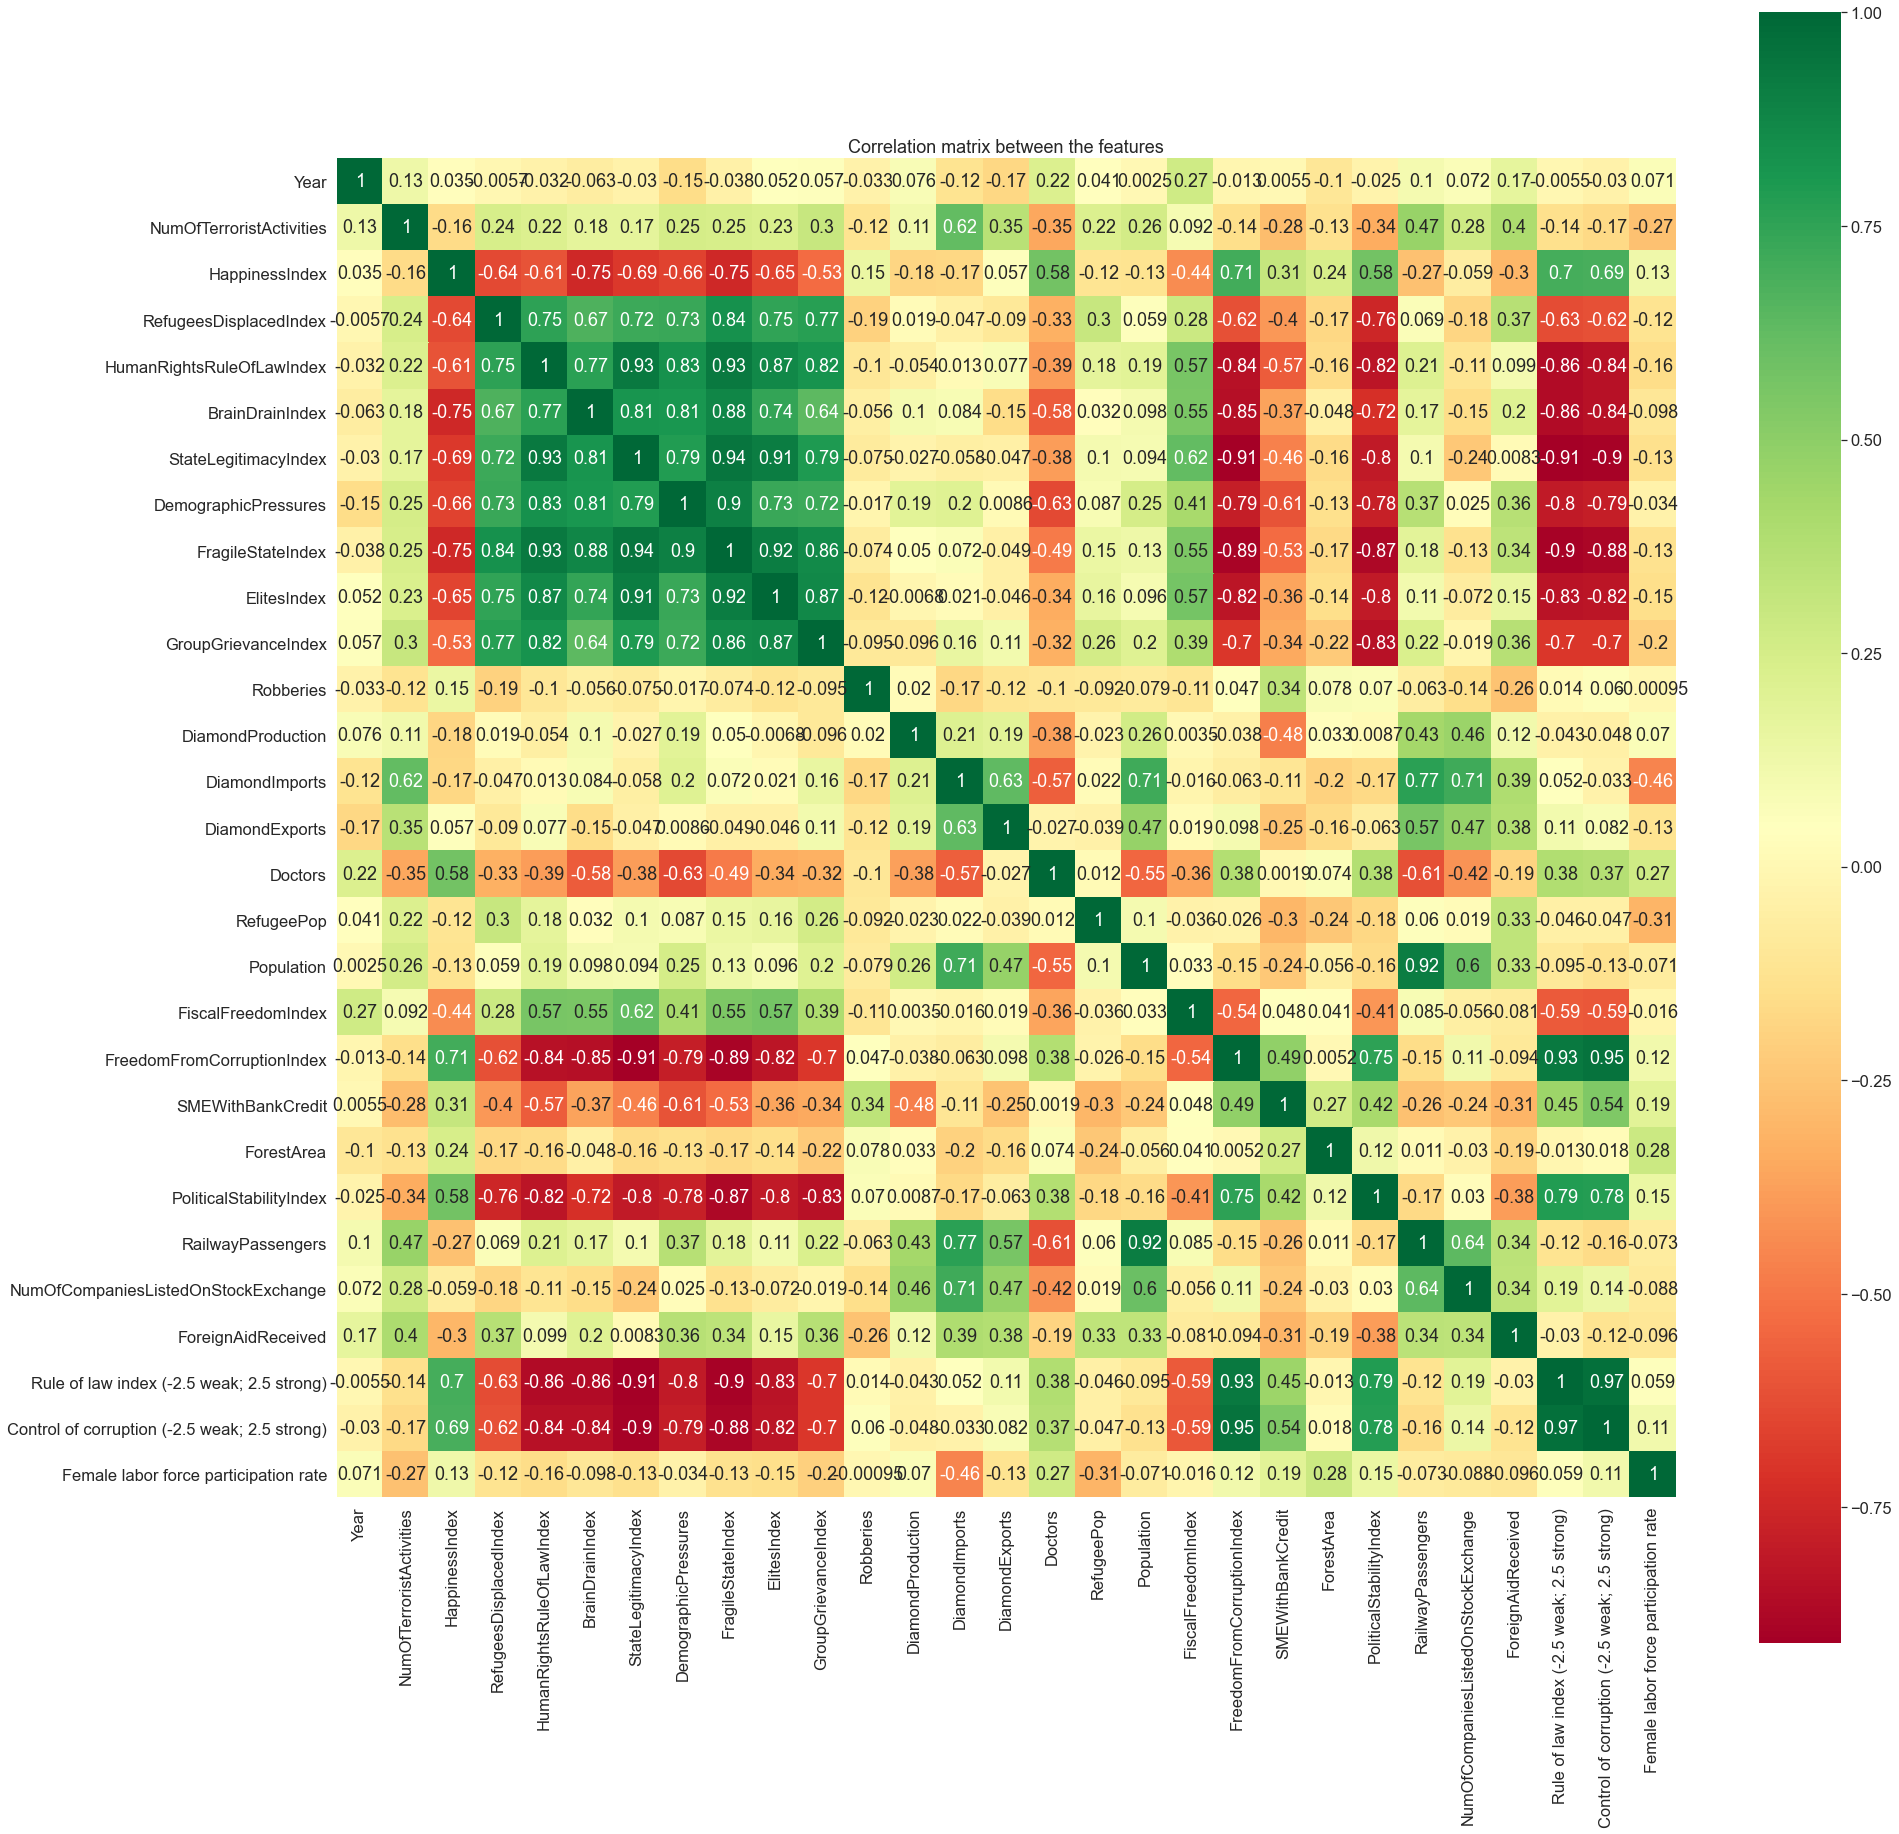

In [221]:
sns.set(font_scale=1.5)  
correlation_matrix = X.corr()
plt.figure(figsize=(30,30))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation matrix between the features')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.savefig('g5.png',bbox_inches='tight')
plt.show()

In [171]:
X_2=X.copy()
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
X_2['Country'] = enc.fit_transform(X_2.Country)
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X_2)
IterativeImputer(random_state=0)
X_Filled=imp.transform(X_2)


In [172]:
X_Filled

array([[ 1.99500000e+03,  1.00000000e+00,  1.85000000e+02, ...,
         6.17834827e-01,  5.54921689e-01,  1.18100000e+01],
       [ 1.99500000e+03,  4.00000000e+00,  5.00000000e+00, ...,
         1.09101947e+00,  1.25655696e+00,  5.36600000e+01],
       [ 1.99500000e+03,  5.00000000e+00,  1.20000000e+01, ...,
         1.65142351e+00,  1.94356503e+00,  4.88100000e+01],
       ...,
       [ 2.01700000e+03,  1.24000000e+02,  6.10000000e+01, ...,
        -7.10000000e-01, -7.80000000e-01,  4.70600000e+01],
       [ 2.01700000e+03,  1.26000000e+02,  1.22000000e+02, ...,
         1.68000000e+00,  1.84000000e+00,  5.72600000e+01],
       [ 2.01700000e+03,  1.32000000e+02,  3.00000000e+00, ...,
        -1.38000000e+00, -1.27000000e+00,  7.79800000e+01]])

In [173]:
all_cols =['Year',
           'Country',
 'NumOfTerroristActivities',
 'HappinessIndex',
 'RefugeesDisplacedIndex',
 'HumanRightsRuleOfLawIndex',
 'BrainDrainIndex',
 'StateLegitimacyIndex',
 'DemographicPressures',
 'FragileStateIndex',
 'ElitesIndex',
 'GroupGrievanceIndex',
 'Robberies',
 'DiamondProduction',
 'DiamondImports',
 'DiamondExports',
 'Doctors',
 'RefugeePop',
 'Population',
 'FiscalFreedomIndex',
 'FreedomFromCorruptionIndex',
 'SMEWithBankCredit',
 'ForestArea',
 'PoliticalStabilityIndex',
 'RailwayPassengers',
 'NumOfCompaniesListedOnStockExchange',
 'ForeignAidReceived',
 'Rule of law index (-2.5 weak; 2.5 strong)',
 'Control of corruption (-2.5 weak; 2.5 strong)',
 'Female labor force participation rate']
X_Filled2 = pd.DataFrame(X_Filled, columns=all_cols)
X_Filled2.head() # sanity check

,Year,Country,NumOfTerroristActivities,HappinessIndex,RefugeesDisplacedIndex,HumanRightsRuleOfLawIndex,BrainDrainIndex,StateLegitimacyIndex,DemographicPressures,FragileStateIndex,...,FreedomFromCorruptionIndex,SMEWithBankCredit,ForestArea,PoliticalStabilityIndex,RailwayPassengers,NumOfCompaniesListedOnStockExchange,ForeignAidReceived,Rule of law index (-2.5 weak; 2.5 strong),Control of corruption (-2.5 weak; 2.5 strong),Female labor force participation rate
0,1995.0,1.0,185.0,6.207976,5.709307,5.305560,4.414358,5.211451,6.375181,63.035573,...,50.000000,31.212111,0.7,-0.264431,1797.0,648.760667,295.740000,0.617835,0.554922,11.81
1,1995.0,4.0,5.0,6.399491,5.344690,5.320526,4.158050,4.783844,6.839288,61.115763,...,70.000000,33.033989,16.8,0.301826,994.0,1129.000000,212.398604,1.091019,1.256557,53.66
2,1995.0,5.0,12.0,6.948536,6.626811,5.361156,3.406554,3.792792,6.152217,54.640843,...,90.000000,32.627372,46.1,0.736842,8526.0,109.000000,538.023965,1.651424,1.943565,48.81
3,1995.0,6.0,2.0,5.688308,5.327124,5.593681,5.045654,6.013643,6.885743,67.669538,...,46.879336,30.262800,10.4,-0.134510,791.0,-494.983496,119.540000,0.226400,0.357901,56.42
4,1995.0,8.0,74.0,5.425488,5.185079,5.233078,5.645979,6.642846,7.022130,73.182987,...,10.000000,32.359360,11.4,-1.021648,4037.0,231.000000,1033.110000,-0.606487,-0.861951,25.68


In [179]:
X_Filled2_mean=X_Filled2.groupby(by=["Year"]).mean().reset_index()
X_Filled2_mean['Year',
 'HappinessIndex',
 'RefugeesDisplacedIndex',
 'HumanRightsRuleOfLawIndex',
 'BrainDrainIndex',
 'StateLegitimacyIndex',
 'DemographicPressures',
 'FragileStateIndex',
 'ElitesIndex',
 'GroupGrievanceIndex',
 'FiscalFreedomIndex',
 'FreedomFromCorruptionIndex',
 'SMEWithBankCredit',
 'ForestArea',
 'PoliticalStabilityIndex',
 'RailwayPassengers',
 'ForeignAidReceived',
 'Rule of law index (-2.5 weak; 2.5 strong)',
 'Control of corruption (-2.5 weak; 2.5 strong)',
 'Female labor force participation rate']

,Year,Country,NumOfTerroristActivities,HappinessIndex,RefugeesDisplacedIndex,HumanRightsRuleOfLawIndex,BrainDrainIndex,StateLegitimacyIndex,DemographicPressures,FragileStateIndex,...,FreedomFromCorruptionIndex,SMEWithBankCredit,ForestArea,PoliticalStabilityIndex,RailwayPassengers,NumOfCompaniesListedOnStockExchange,ForeignAidReceived,Rule of law index (-2.5 weak; 2.5 strong),Control of corruption (-2.5 weak; 2.5 strong),Female labor force participation rate
0,1995.0,62.565217,32.043478,5.981960,5.357469,5.359959,5.252676,5.449316,7.066067,66.067843,...,47.870906,31.488160,32.590028,-0.201937,44306.979830,425.522978,585.374290,0.295666,0.352692,46.550000
1,1996.0,68.170213,39.127660,6.088243,5.079799,5.243212,5.149119,5.211523,6.945619,63.037640,...,52.553191,31.379960,34.140426,0.217021,47260.663927,467.767739,494.544125,0.482128,0.468723,49.347021
2,1997.0,66.177778,37.911111,6.007835,5.180944,5.457707,5.141290,5.526491,6.832703,65.468449,...,48.511111,31.350348,34.163761,-0.155734,49766.227626,424.257924,424.034846,0.279780,0.346855,49.172444
3,1998.0,62.810811,13.027027,5.983161,5.182863,5.323852,5.016428,5.434163,6.728769,64.692954,...,45.918919,30.852302,32.310626,-0.048649,54707.850782,581.016046,488.468938,0.374865,0.394595,46.419189
4,1999.0,65.025000,19.450000,5.948994,5.215686,5.394749,5.125000,5.494795,6.740855,65.692517,...,47.425000,31.503955,33.287228,-0.192077,56950.999558,489.446970,544.640337,0.262794,0.303841,49.255250
5,2000.0,67.219512,19.743902,5.683262,4.898115,5.619455,5.529147,6.154239,6.657015,68.655261,...,37.371483,30.808903,31.704836,-0.399146,44224.565375,105.096782,366.332976,-0.230488,-0.174634,50.357073
6,2001.0,63.315789,29.315789,5.972492,5.156526,5.454948,5.035729,5.473273,6.533189,65.073233,...,49.552632,31.145878,32.463158,-0.148445,58566.147792,546.769934,467.785914,0.303968,0.352438,49.758158
7,2002.0,69.419355,23.741935,5.867225,5.030825,5.484915,5.128980,5.677209,6.493019,65.965236,...,44.064516,30.786556,31.935484,-0.263226,68232.618398,575.235075,552.199218,0.141613,0.092903,48.729355
8,2003.0,69.411765,21.529412,6.019529,5.048094,5.510438,4.943074,5.561807,6.363968,65.520660,...,48.235294,31.690324,33.455882,-0.325294,66684.501493,577.067108,450.314783,0.298529,0.364118,51.538824
9,2004.0,63.370370,16.555556,6.006650,5.176538,5.732391,5.004559,5.783961,6.252877,67.244714,...,43.818812,31.398076,30.200000,-0.588148,75563.191474,642.197933,655.605735,0.113704,0.085926,48.350000


In [196]:
y_train=X_Filled2.NumOfTerroristActivities
X_train=X_Filled2[mylist]

In [199]:
X_train2=X_train.drop(['NumOfTerroristActivities'],axis=1)

In [195]:
ridge = Ridge(alpha=alphas[optlam_R])
ridge.fit(X_train, y_train)
Ridge_rmse_test  = np.sqrt(mean_squared_error(ridge.predict(X_test), y_test))

lasso = Lasso(alpha=alphas[optlam_L])
lasso.fit(X_train, y_train)
Lasso_rmse_test  = np.sqrt(mean_squared_error(lasso.predict(X_test), y_test))

print('                    OLS             OLS(featured)   Ridge           Lasso')
print('R^2 value         : %12.10f    %12.10f    %12.10f    %12.10f' % (R2nonFeatured, R2featured, 
                                                     ridge.score(X_test, y_test), lasso.score(X_test, y_test)))
print('RMSE on test data : %12.10f    %12.10f    %12.10f    %12.10f' % (RMSEnonFeatured, RMSEfeatured,
                                                                         Ridge_rmse_test, Lasso_rmse_test))

0       185.0
1         5.0
2        12.0
3         2.0
4        74.0
        ...  
1039    179.0
1040    181.0
1041     61.0
1042    122.0
1043      3.0
Name: NumOfTerroristActivities, Length: 1044, dtype: float64

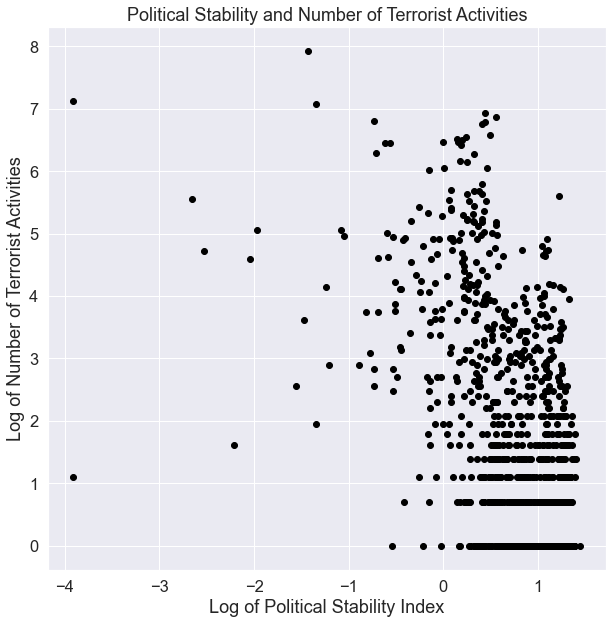

In [279]:
## Some degree of relation between views and comments

import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(np.log(X.PoliticalStabilityIndex+2.5),np.log(X.NumOfTerroristActivities), color='black')
plt.xlabel("Log of Political Stability Index") #x label
plt.ylabel("Log of Number of Terrorist Activities") #y label
plt.title('Political Stability and Number of Terrorist Activities')
plt.savefig('g7.png',bbox_inches='tight')
plt.show()

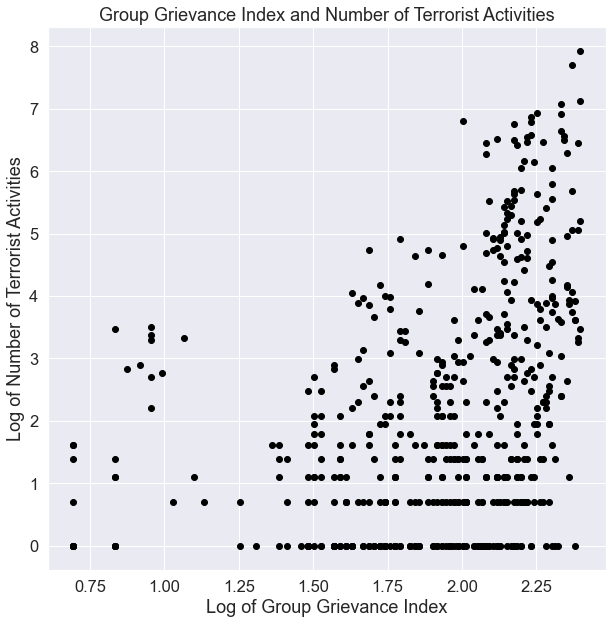

In [282]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(np.log(X.GroupGrievanceIndex+1),np.log(X.NumOfTerroristActivities), color='black')
plt.xlabel("Log of Group Grievance Index") #x label
plt.ylabel("Log of Number of Terrorist Activities") #y label
plt.title('Group Grievance Index and Number of Terrorist Activities')
plt.savefig('g8.png',bbox_inches='tight')
plt.show()

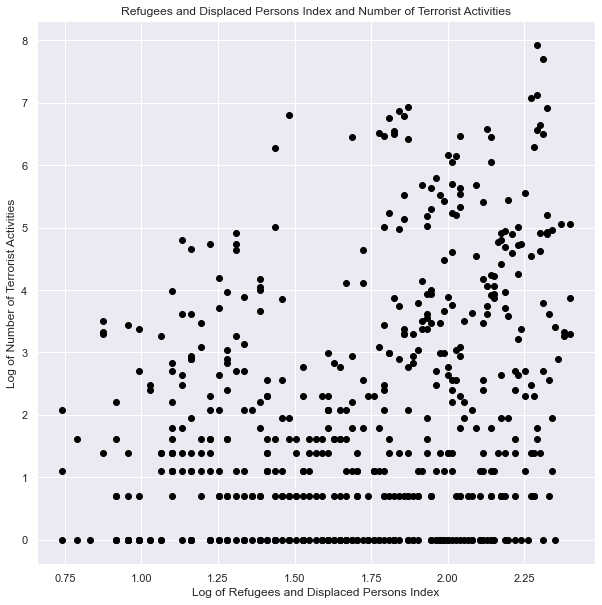

In [32]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(np.log(X.RefugeesDisplacedIndex+1),np.log(X.NumOfTerroristActivities), color='black')
plt.xlabel("Log of Refugees and Displaced Persons Index") #x label
plt.ylabel("Log of Number of Terrorist Activities") #y label
plt.title('Refugees and Displaced Persons Index and Number of Terrorist Activities')
plt.savefig('g9.png',bbox_inches='tight')
plt.show()

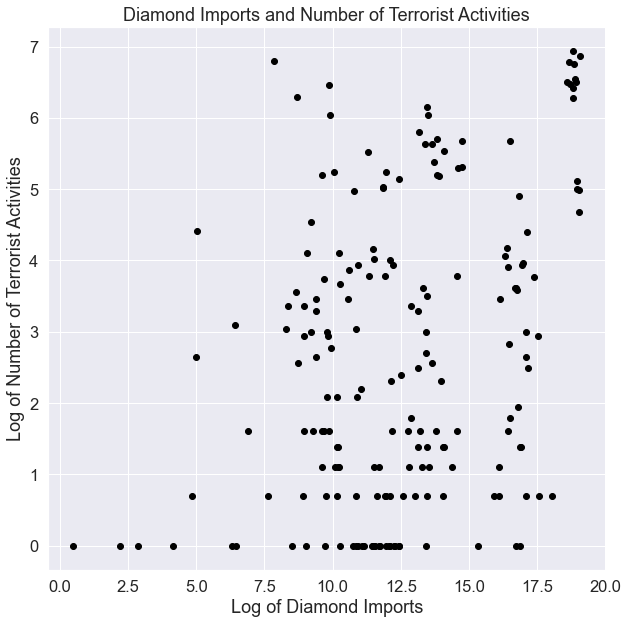

In [267]:
## Some degree of relation between views and comments

import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(np.log(X.DiamondImports),np.log(X.NumOfTerroristActivities), color='black')
plt.xlabel("Log of Diamond Imports") #x label
plt.ylabel("Log of Number of Terrorist Activities") #y label
plt.title('Diamond Imports and Number of Terrorist Activities')
plt.savefig('g6.png',bbox_inches='tight')
plt.show()

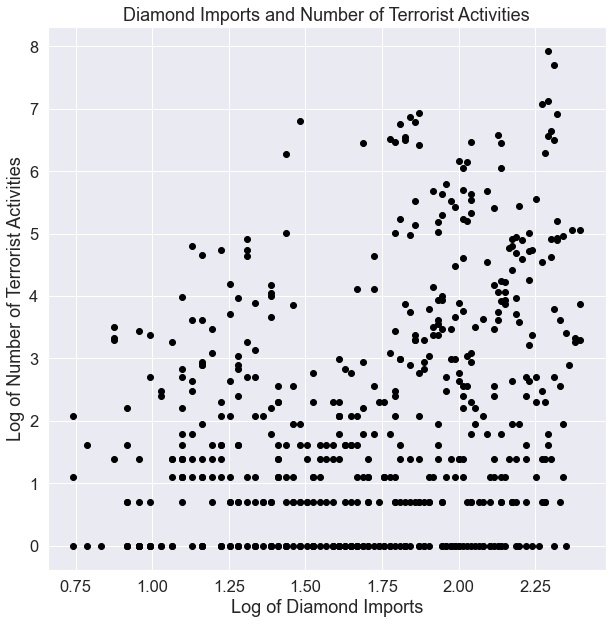

In [297]:
## Some degree of relation between views and comments

import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(np.log(X.RefugeesDisplacedIndex+1),np.log(X.NumOfTerroristActivities), color='black')
plt.xlabel("Log of Diamond Imports") #x label
plt.ylabel("Log of Number of Terrorist Activities") #y label
plt.title('Diamond Imports and Number of Terrorist Activities')
plt.savefig('g6.png',bbox_inches='tight')
plt.show()

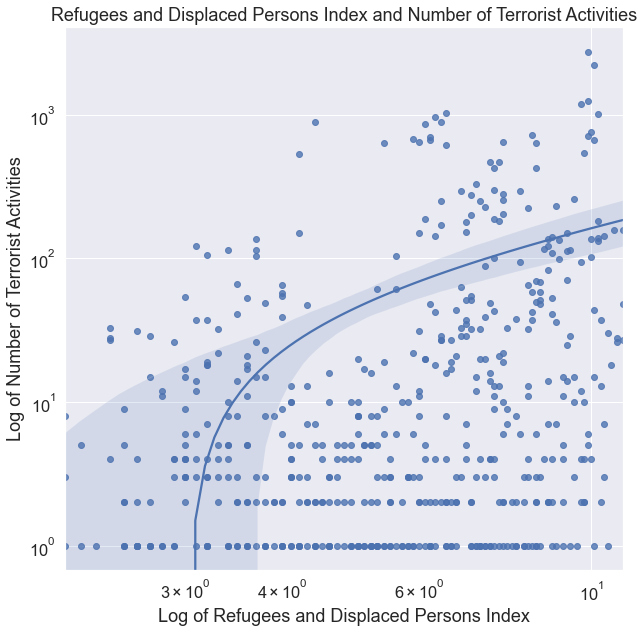

In [288]:
plt.figure(figsize=(10, 10))
ax = sns.regplot(x=X.RefugeesDisplacedIndex+1, y="NumOfTerroristActivities",data=X)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Log of Refugees and Displaced Persons Index") #x label
plt.ylabel("Log of Number of Terrorist Activities") #y label
plt.title('Refugees and Displaced Persons Index and Number of Terrorist Activities')
plt.savefig('g10.png',bbox_inches='tight')

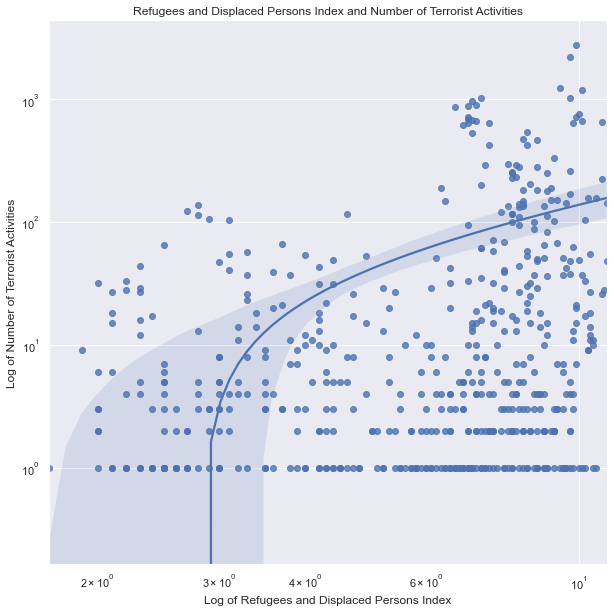

In [33]:
plt.figure(figsize=(10, 10))
ax = sns.regplot(x=X.HumanRightsRuleOfLawIndex+1, y="NumOfTerroristActivities",data=X)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Log of Refugees and Displaced Persons Index") #x label
plt.ylabel("Log of Number of Terrorist Activities") #y label
plt.title('Refugees and Displaced Persons Index and Number of Terrorist Activities')
plt.savefig('g10.png',bbox_inches='tight')

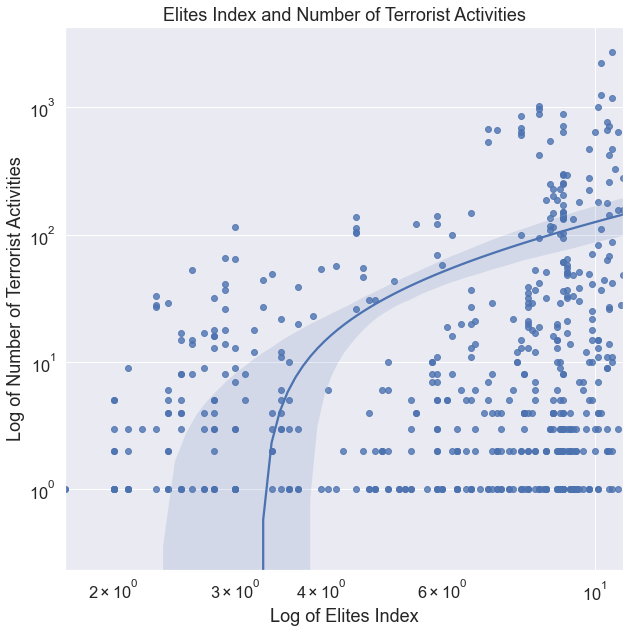

In [289]:
plt.figure(figsize=(10, 10))
ax = sns.regplot(x=X.ElitesIndex+1, y="NumOfTerroristActivities",data=X)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Log of Elites Index") #x label
plt.ylabel("Log of Number of Terrorist Activities") #y label
plt.title('Elites Index and Number of Terrorist Activities')
plt.savefig('g11.png',bbox_inches='tight')

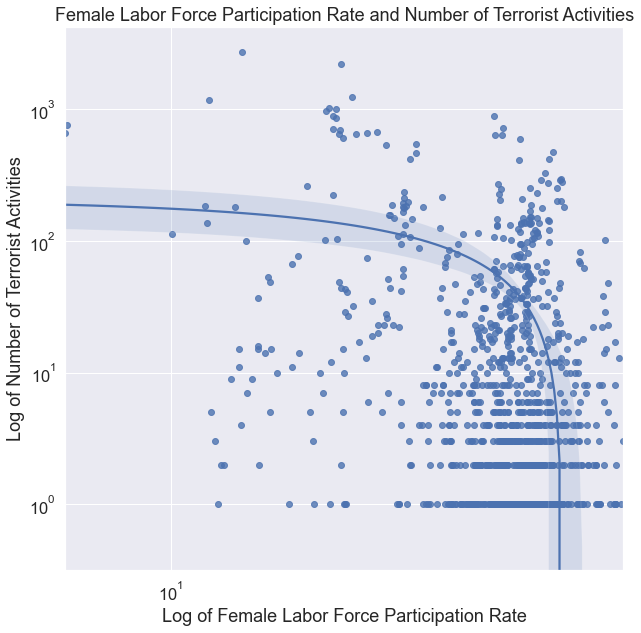

In [295]:
plt.figure(figsize=(10, 10))
ax = sns.regplot(x=X.FemaleLaborParticipationRate, y="NumOfTerroristActivities",data=X)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Log of Female Labor Force Participation Rate") #x label
plt.ylabel("Log of Number of Terrorist Activities") #y label
plt.title('Female Labor Force Participation Rate and Number of Terrorist Activities')
plt.savefig('g11.png',bbox_inches='tight')


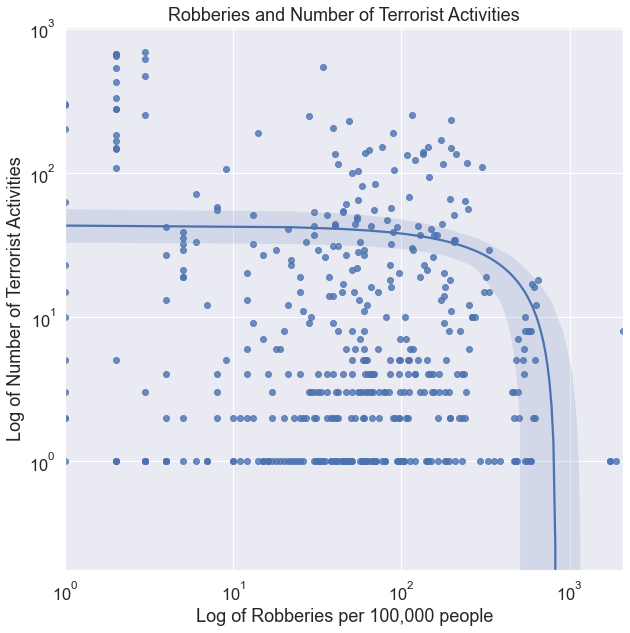

In [296]:
plt.figure(figsize=(10, 10))
ax = sns.regplot(x=X.Robberies, y="NumOfTerroristActivities",data=X)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Log of Robberies per 100,000 people") #x label
plt.ylabel("Log of Number of Terrorist Activities") #y label
plt.title('Robberies and Number of Terrorist Activities')
plt.savefig('g12.png',bbox_inches='tight')


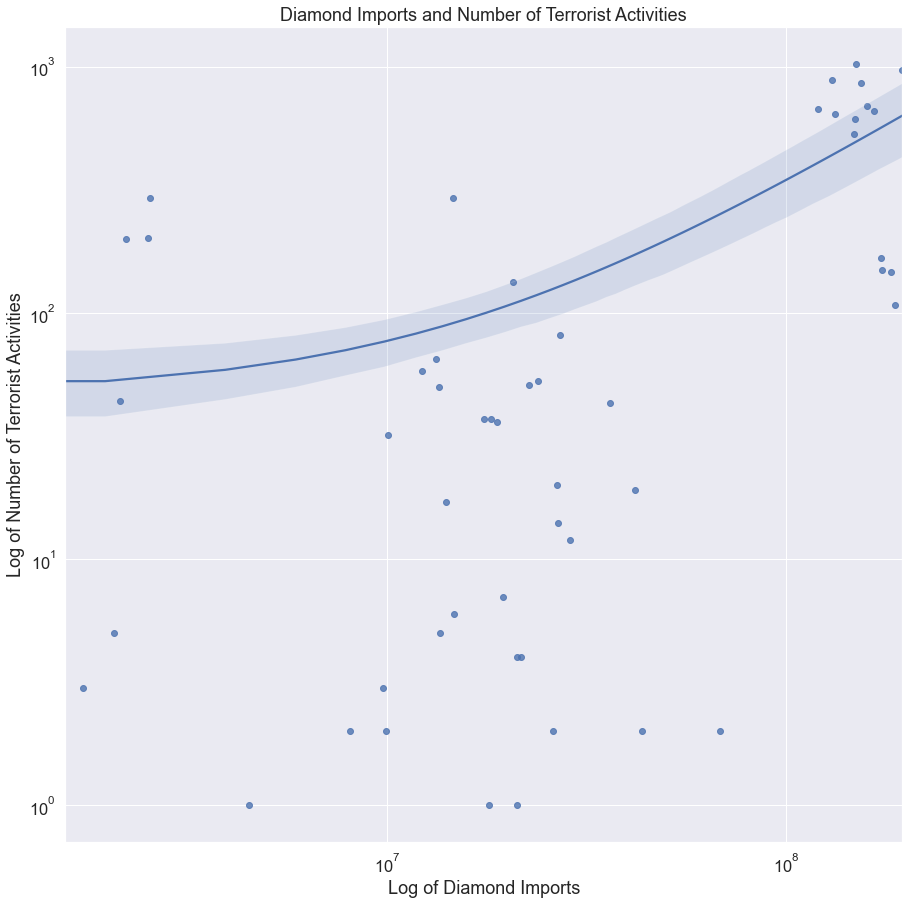

In [266]:
f, ax = plt.subplots(figsize=(15, 15))
ax.set(xscale="log", yscale="log")
sns.regplot("DiamondImports", "NumOfTerroristActivities", X, ax=ax)
plt.xlabel("Log of Diamond Imports") #x label
plt.ylabel("Log of Number of Terrorist Activities") #y label
plt.title('Diamond Imports and Number of Terrorist Activities')
plt.savefig('g7.png',bbox_inches='tight')

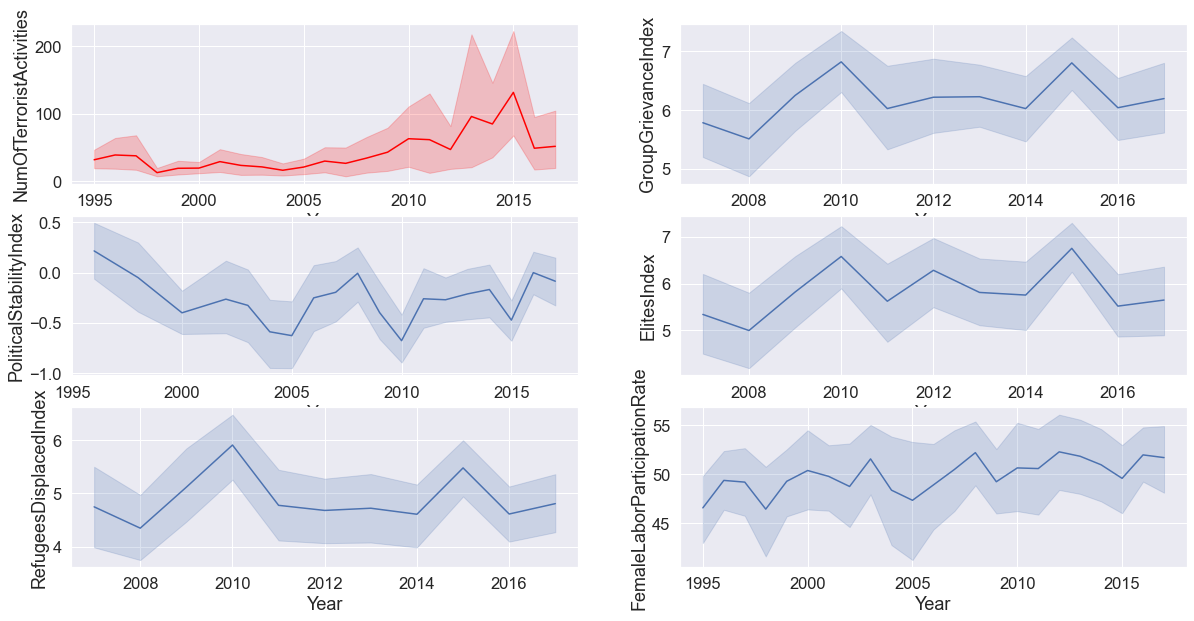

In [308]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.lineplot(x="Year", y="NumOfTerroristActivities", data=X, color='red') 
plt.subplot(322)
sns.lineplot(x="Year", y="GroupGrievanceIndex", data=X) 
plt.subplot(323)
sns.lineplot(x="Year", y="PoliticalStabilityIndex", data=X) 
plt.subplot(324)
sns.lineplot(x="Year", y="ElitesIndex", data=X) 
plt.subplot(325)
sns.lineplot(x="Year", y="RefugeesDisplacedIndex", data=X) 
plt.subplot(326)
sns.lineplot(x="Year", y="FemaleLaborParticipationRate", data=X) 
plt.savefig('g12.png',bbox_inches='tight')
plt.show()